In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [4]:
merged = pd.read_csv("vanguard_merged.csv")
base = pd.read_csv("base.csv")
demo = pd.read_csv("demo.csv")

In [2]:
base.columns

Index(['client_id', 'tenure_year', 'tenure_month', 'age', 'gender',
       'num_accounts', 'balance', 'calls_6_months', 'logons_6_months',
       'variation'],
      dtype='object')

# * Demographic Questions

Q1: Who are the primary clients using this process?

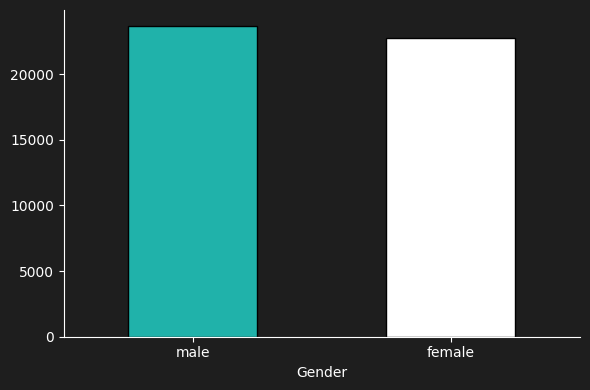

In [5]:
# Count of each gender in df_base, excluding 'unknown'
gender_counts = base['gender'].value_counts()
gender_counts = gender_counts[gender_counts.index.str.lower() != 'unknown']  # Remove 'unknown'

# Define bar colors: white for female, lightseagreen for others
bar_colors = ['white' if gender.lower() == 'female' else 'lightseagreen' for gender in gender_counts.index]

# Visualize with deep dark grey background


plt.figure(figsize=(6, 4), facecolor='#1e1e1e')  # Deep dark grey background
ax = gender_counts.plot(kind='bar', color=bar_colors, edgecolor='black')

# Apply dark background to plot area
ax.set_facecolor('#1e1e1e')

# Set text and ticks to white
#ax.set_title('Gender Distribution', color='white')
ax.set_xlabel('Gender', color='white')
#ax.set_ylabel('Count', color='white')
ax.tick_params(colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



In [6]:
#Statistics of the 'balance' column in df_base

balance_stats = base['balance'].describe()

balance_stats = balance_stats.apply(lambda x: f"{x:,.2f}")
print(balance_stats)

count        70,527.00
mean        147,237.04
std         301,252.57
min          13,789.42
25%          37,335.56
50%          63,302.46
75%         137,303.76
max      16,320,040.15
Name: balance, dtype: object


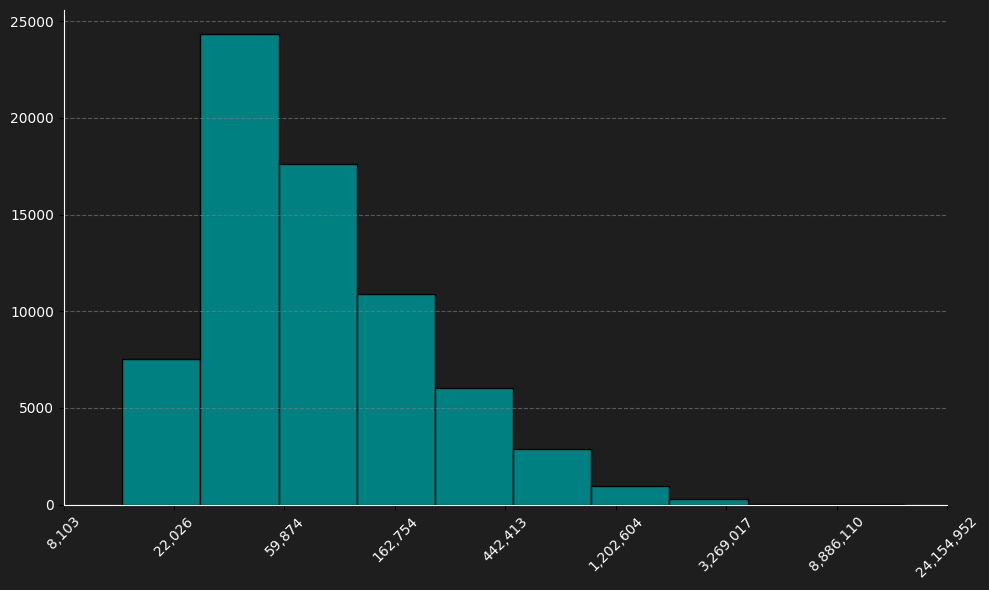

In [8]:
# Log-transform positive balances
log_balances = np.log(base['balance'][base['balance'] > 0])

# Plot histogram of log-transformed data with dark background
plt.figure(figsize=(10, 6), facecolor='#1e1e1e')  # Set figure background
ax = plt.gca()  # Get current axes
ax.set_facecolor('#1e1e1e')  # Set axes background

# Plot histogram
n, bins, patches = plt.hist(log_balances, bins=10, color='teal', edgecolor='black')

# Replace log-scale x-ticks with actual balance values
tick_positions = plt.xticks()[0]
tick_labels = [f"{int(np.exp(tick)):,}" for tick in tick_positions]

plt.xticks(tick_positions, tick_labels, rotation=45, color='white')
plt.yticks(color='white')
plt.grid(axis='y', linestyle='--', alpha=0.6, color='gray')

# Style axes spines
for spine in ['bottom', 'left']:
    ax.spines[spine].set_color('white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [9]:
base['balance'].describe().round(2)

count       70527.00
mean       147237.04
std        301252.57
min         13789.42
25%         37335.56
50%         63302.46
75%        137303.76
max      16320040.15
Name: balance, dtype: float64

Q2: Are they younger or older, new or long-standing?


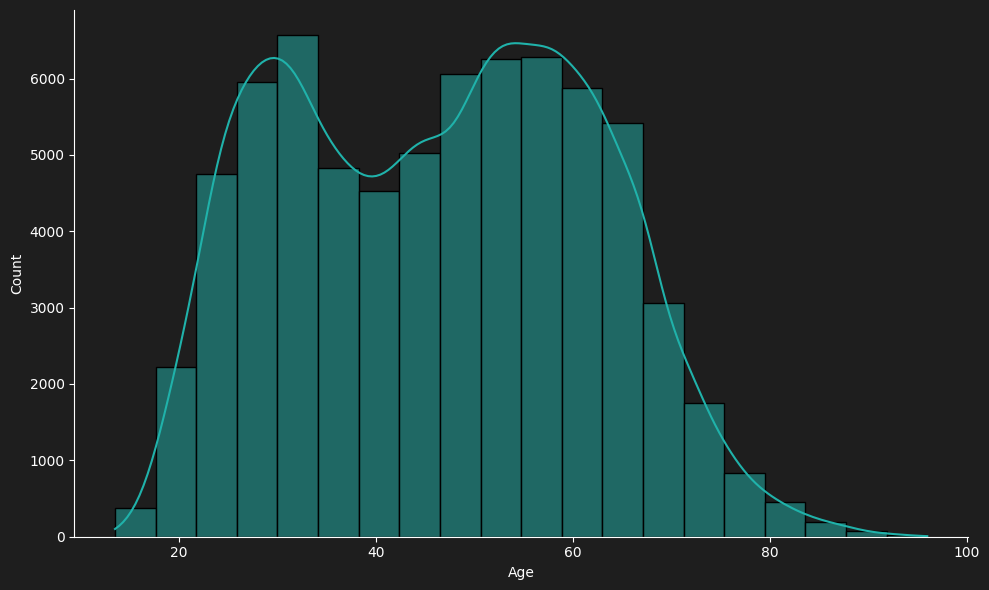

In [18]:
# Set up the figure with dark background
plt.figure(figsize=(10, 6), facecolor='#1e1e1e')  # Figure background
ax = plt.gca()  # Get current axes
ax.set_facecolor('#1e1e1e')  # Axes background

# Plot histogram
sns.histplot(demo['age'], bins=20, kde=True, color='lightseagreen', edgecolor='black', ax=ax)

# Ticks and spines in white
ax.tick_params(colors='white')
for spine in ['bottom', 'left']:
    ax.spines[spine].set_color('white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel("Count", color='white')
ax.set_xlabel("Age",color='white')

plt.tight_layout()
ax.grid(False)  # Turn off grid lines
plt.show()


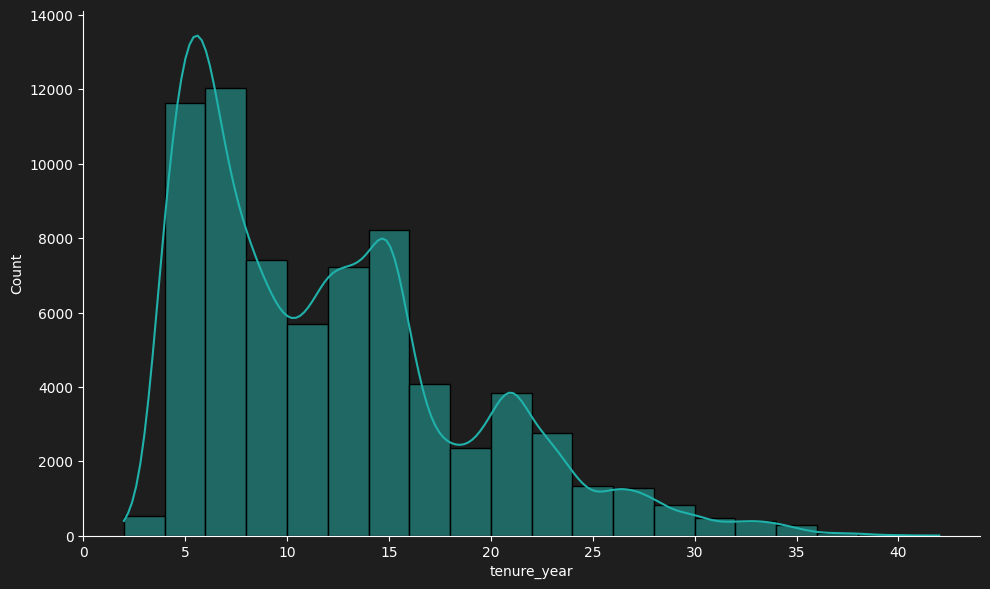

In [19]:
# Set up the figure with dark background
plt.figure(figsize=(10, 6), facecolor='#1e1e1e')  # Figure background
ax = plt.gca()  # Get current axes
ax.set_facecolor('#1e1e1e')  # Axes background

# Plot histogram
sns.histplot(base['tenure_year'], bins=20, kde=True, color='lightseagreen', edgecolor='black', ax=ax)

ax.set_ylabel("Count", color='white')
ax.set_xlabel("tenure_year",color='white')
# Ticks and spines in white
ax.tick_params(colors='white')
for spine in ['bottom', 'left']:
    ax.spines[spine].set_color('white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

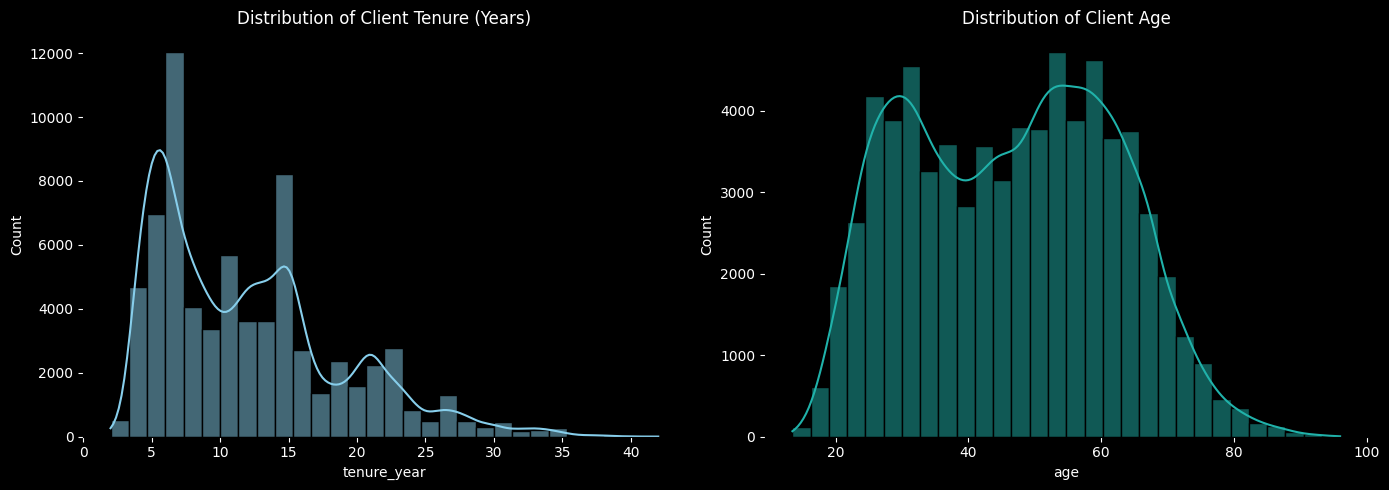

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5), facecolor='black')  # Set figure background to black

# First plot: tenure distribution
sns.histplot(base['tenure_year'], bins=30, kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of Client Tenure (Years)', color='white')  # Title in white
ax[0].set_facecolor('black')  # Axes background
ax[0].tick_params(colors='white')  # Tick labels
ax[0].xaxis.label.set_color('white')  # X label
ax[0].yaxis.label.set_color('white')  # Y label

# Second plot: age distribution
sns.histplot(base['age'], bins=30, kde=True, ax=ax[1], color='lightseagreen')
ax[1].set_title('Distribution of Client Age', color='white')
ax[1].set_facecolor('black')
ax[1].tick_params(colors='white')
ax[1].xaxis.label.set_color('white')
ax[1].yaxis.label.set_color('white')

plt.tight_layout()
plt.show()




# Client Tenure & Age Insights

The average Vanguard client has been with the company for approximately 12 years, with the central 50% ranging between 6 and 16 years. This indicates strong loyalty and long-term engagement across a wide user base.

With a maximum tenure of 42 years, the platform supports some remarkably enduring relationships—clients who’ve likely weathered multiple market cycles and product evolutions.

The standard deviation of 6.78 years reveals a healthy mix of newcomers and seasoned investors, enriching the user dataset with varied behaviors and expectations.

Age Distribution Context

The mean age is 46.43, with the bulk of clients falling between 32 and 59 years old.

This middle-aged demographic, combined with extended tenure, suggests a client base with financial maturity, accumulated assets, and a vested interest in long-term outcomes.

Outliers at both ends—young users (min age ~13.5) and elder clients (max age 96)—reflect Vanguard’s broad accessibility, from custodial accounts to retirement-focused investors.

# Conclusion

Vanguard’s digital platform primarily serves experienced, long-standing clients who are largely middle-aged or older. This demographic profile reflects a high level of trust, sustained engagement, and a deep familiarity with investment tools. Designing with these users in mind—clear navigation, tailored content, and portfolio personalization—could significantly enhance satisfaction and retention.

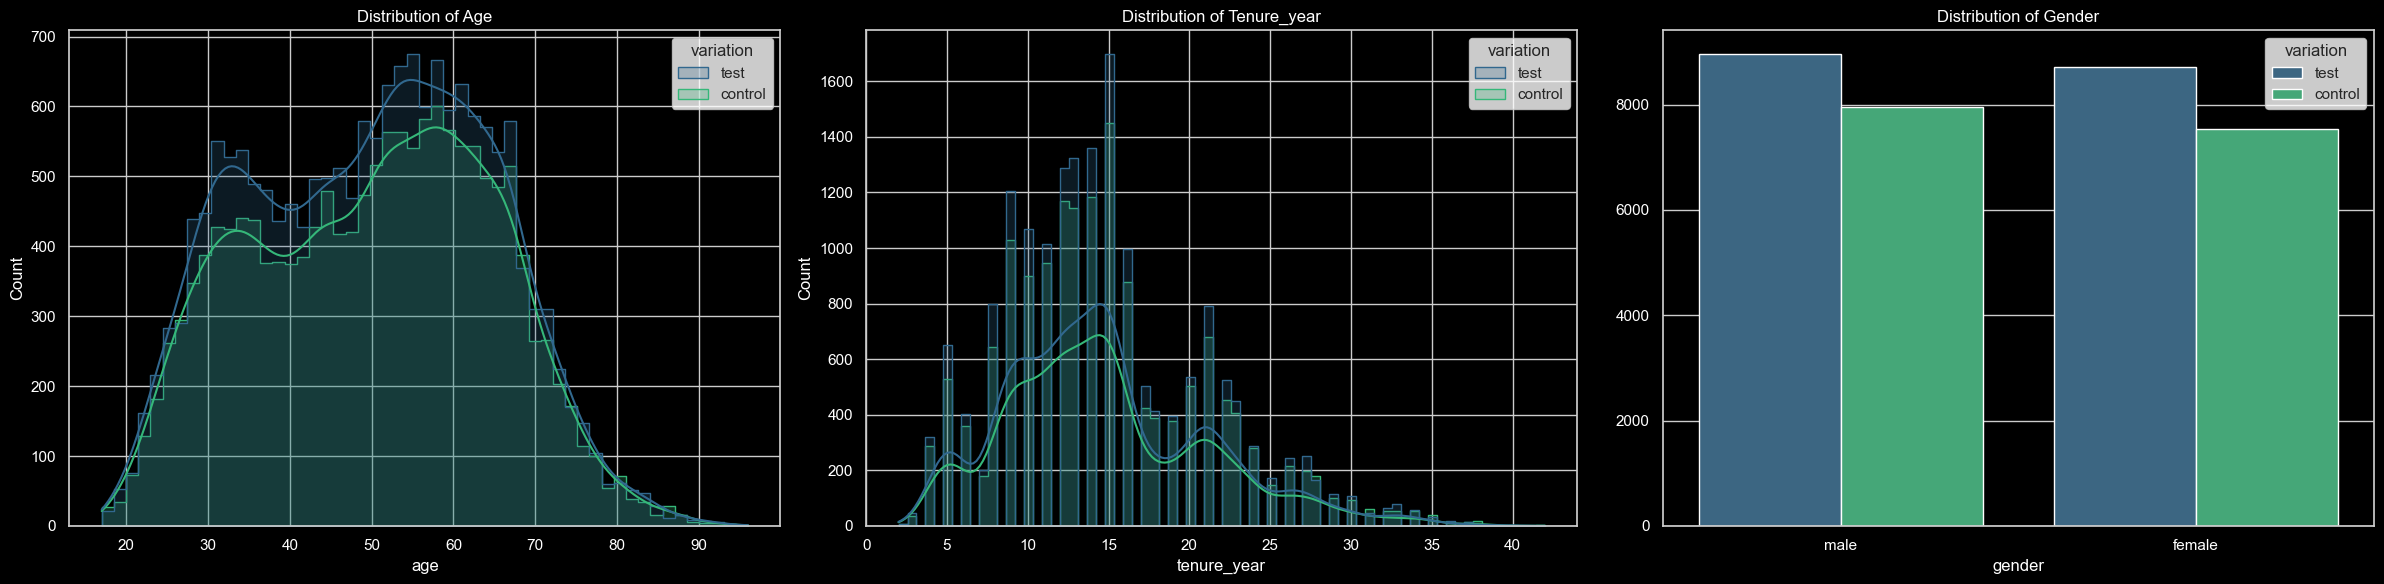

In [28]:
# Filter out 'unknown' in both variation and gender
filtered_base = base[(base['variation'] != 'unknown') & (base['gender'] != 'unknown')]

# Columns to plot
plot_columns = ['age', 'tenure_year', 'gender']

# Create a subplot grid: 1 row, 4 columns
fig, axes = plt.subplots(1, 3, figsize=(24, 6), facecolor='black')  # Adjust width as needed

# Loop through each column and corresponding axis
for ax, col in zip(axes, plot_columns):
    if col == 'gender':
        sns.countplot(data=filtered_base, x=col, hue='variation', palette='viridis', ax=ax)
        ax.set_ylabel('')
    else:
        sns.histplot(data=filtered_base, x=col, hue='variation', kde=True,
                     palette='viridis', element='step', ax=ax)
        ax.set_ylabel('Count')

    # Style each subplot
    ax.set_facecolor('black')
    ax.set_xlabel(col, color='white')
    ax.set_title(f'Distribution of {col.capitalize()}', color='white')
    ax.tick_params(colors='white')
    ax.yaxis.label.set_color('white')

plt.tight_layout()
plt.show()